In [7]:
import pandas as pd
from hanziconv import HanziConv

import jieba
import jieba.posseg as pseg
import jieba.analyse


import sys
from optparse import OptionParser
import pprint
from prettytable import PrettyTable

In [20]:
df = pd.read_csv(open('../data/df_small.csv'))


In [21]:
df.head()

,Unnamed: 0,from,text
0,0,ud4097fbb4471c8c54512814bf0182e03,wd
1,1,ud4097fbb4471c8c54512814bf0182e03,嗨嗨
2,2,u96e826dccd3c9db56d684a5ddffc3154,蛤？
3,3,ud4097fbb4471c8c54512814bf0182e03,你是第二個使用者ＱＱ
4,4,u96e826dccd3c9db56d684a5ddffc3154,哈哈哈哈哈哈哈


In [32]:
fileTrainSeg = []

In [33]:
for i in range(len(df)):
    seg_list = jieba.cut(df['text'][i])  # 默认是精确模式
#     print("/".join(seg_list))
    fileTrainSeg.append([' '.join(list(jieba.cut(str(df['text'][i]),cut_all=False)))])
    if i % 50000 == 0 :
        print(i)

0
50000


In [34]:
fileSegWordDonePath ='corpusSegDone.txt'
with open(fileSegWordDonePath,'wb') as fW:
    for i in range(len(fileTrainSeg)):
        fW.write(str(fileTrainSeg[i][0]).encode('utf-8'))
        fW.write('\n'.encode('utf-8'))

In [35]:
def PrintListChinese(list):
    for i in range(len(list)):
        print(list[i],)
PrintListChinese(fileTrainSeg[19])

蛤


In [36]:
import word2vec
# jieba分詞轉word2vec向量
word2vec.word2vec('corpusSegDone.txt', 'corpusWord2Vec.bin', size=300,verbose=True)

Starting training using file corpusSegDone.txt
Vocab size: 4440
Words in train file: 594092
Alpha: 0.000578  Progress: 98.02%  Words/thread/sec: 276.26k  

In [37]:
model = word2vec.load('corpusWord2Vec.bin')
# print(model.vectors)

In [38]:
for i in range(0,24):
    print(model.vocab[i])

</s>
我
你
/
_
.
的
是
=
-
?
神
海
定
針
？
了
嗎
好
啊
ㄇ
不
↑
←


In [61]:
model = word2vec.load('corpusWord2Vec.bin')
indexes = model.cosine(u'學生') # 此字詞有出現在corpusWord2Vec.bin當中
for index in indexes[0]:
    print(model.vocab[index])

宇宙
幸運
真人
高中
大學生
帥
腫哥
妳是
問你
高中生


In [62]:
model = word2vec.load('corpusWord2Vec.bin')
indexes = model.cosine(u'錢') # 此字詞有出現在corpusWord2Vec.bin當中
for index in indexes[0]:
    print(model.vocab[index])

之前
上
工作
想到
只是
時間
他們
po
那麼
其他人


In [67]:
model = word2vec.load('corpusWord2Vec.bin')
indexes = model.cosine(u'交換') # 此字詞有出現在corpusWord2Vec.bin當中
for index in indexes[0]:
    print(model.vocab[index])

聊聊
五分
土城
當
还
運動
還能
腦子
單獨
別想


In [54]:
index1,metrics1 = model.cosine(u'學生')
index2,metrics2 = model.cosine(u'聊天')
index3,metrics3 = model.cosine(u'社會')
# index4,metrics4 = model.cosine(u'錢')
# index5,metrics5 = model.cosine(u'可以')

In [55]:
import numpy as np
index01 = np.where(model.vocab == u'學生')
index02 = np.where(model.vocab == u'聊天')
index03 = np.where(model.vocab == u'社會')
# index04 = np.where(model.vocab == u'錢')
# index05 = np.where(model.vocab == u'可以')

In [56]:
index1 = np.append(index1,index01)
index2 = np.append(index2,index02)
index3 = np.append(index3,index03)
# index4 = np.append(index4,index04)
# index5 = np.append(index5,index05)

In [57]:
import numpy as np
# 視覺化套件
import matplotlib
import matplotlib.pyplot as plt
# 主成分因子
from sklearn.decomposition import PCA

In [58]:
rawWordVec = model.vectors
# 將原本300維向量空間降為2維
X_reduced = PCA(n_components=2).fit_transform(rawWordVec)

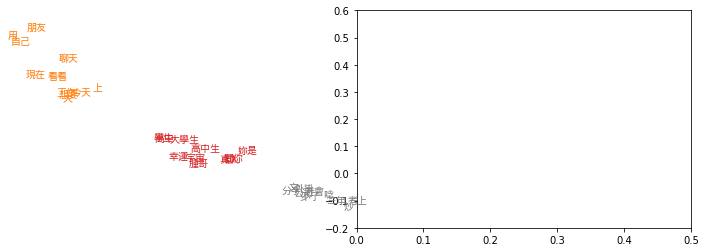

In [60]:
zhfont = matplotlib.font_manager.FontProperties(fname='wqy-microhei.ttc')
# 畫圖
fig = plt.figure()
ax = fig.add_subplot(111)
 
for i in index1:
    ax.text(X_reduced[i][0],X_reduced[i][1],model.vocab[i], fontproperties=zhfont,color='C3')
for i in index2:
    ax.text(X_reduced[i][0],X_reduced[i][1],model.vocab[i], fontproperties = zhfont,color= 'C1')
for i in index3:
    ax.text(X_reduced[i][0],X_reduced[i][1],model.vocab[i], fontproperties=zhfont,color='C7')
# for i in index4:
#     ax.text(X_reduced[i][0],X_reduced[i][1],model.vocab[i], fontproperties=zhfont,color='C0')
# for i in index5:
#     ax.text(X_reduced[i][0],X_reduced[i][1],model.vocab[i], fontproperties=zhfont,color='C4')
ax.axis([0,0.5,-0.2,0.6])
plt.figure(figsize=(100,100))
plt.show()

In [12]:
def loadjieba():
  # 使用繁體中文詞庫
  jieba.set_dictionary('jieba_txt/dict.txt.big.txt')
  # 將自定義詞庫加進來
  jieba.load_userdict("jieba_txt/userdict.txt") 
  # 停用詞
  jieba.analyse.set_stop_words("jieba_txt/stop_words.txt")
  jieba.analyse.set_idf_path("jieba_txt/idf.txt.big.txt")

  # input_file = open(filename, 'r', encoding = utf8())

# def cutandcount(filename):
#   content = open(filename, 'rb').read()
#   seglist = jieba.cut(content, cut_all=False)
#   chars = set(' 0123456789()$,:.。，/􀆿\r\n')


# # 原本在字典裡的 斷詞 ＆ 頻率
# # 讀入 og_dict
#   with open('newdict.txt','rt') as f:
#     for line in f:
#       k = line.split('\t')[0]
#       v = line.split('\t')[1][:-1]
      
#       if k in og_dict.keys():
#         og_dict[k] = v+1
#       else:
#         og_dict[k] = v


# # 斷新的文字檔之後，把新的詞加入並把頻率設成 1
# # 舊的詞在 value +1
#   for word in seglist:
#     if any((c in chars) for c in word):
#       continue
#     else:
#       if not word in og_dict.keys():
#         og_dict[word] = 1
#       else:
#         og_dict[word] = int(og_dict[word]) + 1

#   print('it is NEW DATA !!!!!'+str(og_dict)+'!!!!')

#   with open('newdict.txt','w') as f:
#       for k,v in og_dict.items():
#         f.write(k+'\t'+str(v)+'\n')



In [84]:
grouped_data = df.groupby('from')['text'].apply(lambda x: "{%s}" % ', '.join(x))

In [85]:
len(grouped_data)

1019